In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL.ImagePalette import random

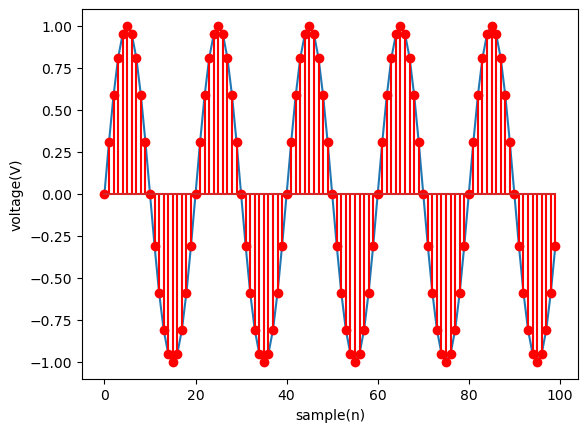

In [31]:
Fs = 100
f = 5
sample = 100
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x, y)
plt.stem(x, y, 'r')
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()

In [32]:
def pre_emphasis(signal, alpha=0.95):
    emphasized_signal = np.append(signal[0], signal[1:] - alpha * signal[:-1])
    return emphasized_signal

In [33]:
emphasized_signal = pre_emphasis(y)

<StemContainer object of 3 artists>

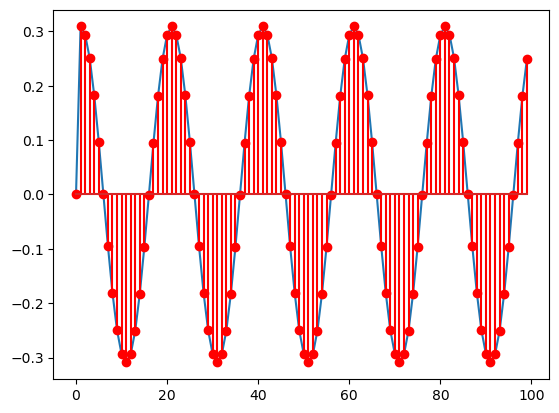

In [34]:
plt.plot(x, emphasized_signal)
plt.stem(x, emphasized_signal, 'r')


In [35]:
for i in range(len(emphasized_signal)):
    print(f'emphasised: {emphasized_signal[i]}, y: {y[i]}')

emphasised: 0.0, y: 0.0
emphasised: 0.3090169943749474, y: 0.3090169943749474
emphasised: 0.2942191076362731, y: 0.5877852522924731
emphasised: 0.2506210046970979, y: 0.8090169943749473
emphasised: 0.18249037163895354, y: 0.9510565162951535
emphasised: 0.0964963095196042, y: 1.0
emphasised: 0.0010565162951536866, y: 0.9510565162951536
emphasised: -0.09448669610544846, y: 0.8090169943749475
emphasised: -0.18078089236372674, y: 0.5877852522924732
emphasised: -0.24937899530290203, y: 0.3090169943749475
emphasised: -0.2935661446562, y: 1.2246467991473532e-16
emphasised: -0.3090169943749474, y: -0.3090169943749473
emphasised: -0.2942191076362728, y: -0.5877852522924727
emphasised: -0.25062100469709836, y: -0.8090169943749473
emphasised: -0.18249037163895354, y: -0.9510565162951535
emphasised: -0.0964963095196042, y: -1.0
emphasised: -0.0010565162951536866, y: -0.9510565162951536
emphasised: 0.09448669610544835, y: -0.8090169943749476
emphasised: 0.18078089236372674, y: -0.5877852522924734
e

In [48]:
def framing(sig, fs=16000, win_len=0.10, win_hop=0.01):
    """
    transform a signal into a series of overlapping frames.

    Args:
        sig            (array) : a mono audio signal (Nx1) from which to compute features.
        fs               (int) : the sampling frequency of the signal we are working with.
                                 Default is 16000.
        win_len        (float) : window length in sec.
                                 Default is 0.025.
        win_hop        (float) : step between successive windows in sec.
                                 Default is 0.01.

    Returns:
        array of frames.
        frame length.
    """
    # compute frame length and frame step (convert from seconds to samples)
    frame_length = win_len * fs
    frame_step = win_hop * fs
    signal_length = len(sig)
    frames_overlap = frame_length - frame_step

    # Make sure that we have at least 1 frame+
    num_frames = np.abs(signal_length - frames_overlap) // np.abs(frame_length - frames_overlap)
    rest_samples = np.abs(signal_length - frames_overlap) % np.abs(frame_length - frames_overlap)

    # Pad Signal to make sure that all frames have equal number of samples
    # without truncating any samples from the original signal
    if rest_samples != 0:
        pad_signal_length = int(frame_step - rest_samples)
        z = np.zeros(pad_signal_length)
        pad_signal = np.append(sig, z)
        num_frames += 1
    else:
        pad_signal = sig

    # make sure to use integers as indices
    frame_length = int(frame_length)
    frame_step = int(frame_step)
    num_frames = int(num_frames)

    # compute indices
    idx1 = np.tile(np.arange(0, frame_length), (num_frames, 1))
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_length, 1)).T
    indices = idx1 + idx2
    frames = pad_signal[indices.astype(np.int32, copy=False)]
    return frames


In [49]:
frames = framing(emphasized_signal, fs=Fs)

In [50]:
frames

array([[ 0.        ,  0.30901699,  0.29421911,  0.250621  ,  0.18249037,
         0.09649631,  0.00105652, -0.0944867 , -0.18078089, -0.249379  ],
       [ 0.30901699,  0.29421911,  0.250621  ,  0.18249037,  0.09649631,
         0.00105652, -0.0944867 , -0.18078089, -0.249379  , -0.29356614],
       [ 0.29421911,  0.250621  ,  0.18249037,  0.09649631,  0.00105652,
        -0.0944867 , -0.18078089, -0.249379  , -0.29356614, -0.30901699],
       [ 0.250621  ,  0.18249037,  0.09649631,  0.00105652, -0.0944867 ,
        -0.18078089, -0.249379  , -0.29356614, -0.30901699, -0.29421911],
       [ 0.18249037,  0.09649631,  0.00105652, -0.0944867 , -0.18078089,
        -0.249379  , -0.29356614, -0.30901699, -0.29421911, -0.250621  ],
       [ 0.09649631,  0.00105652, -0.0944867 , -0.18078089, -0.249379  ,
        -0.29356614, -0.30901699, -0.29421911, -0.250621  , -0.18249037],
       [ 0.00105652, -0.0944867 , -0.18078089, -0.249379  , -0.29356614,
        -0.30901699, -0.29421911, -0.250621  

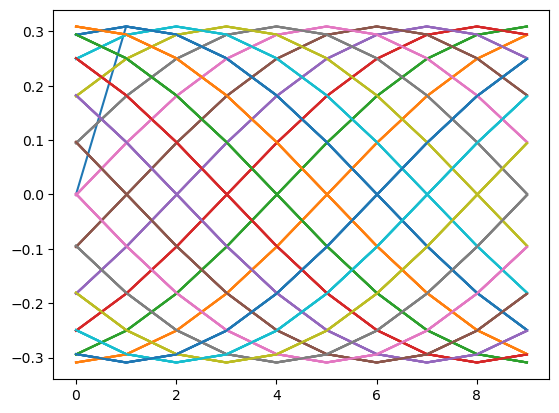

In [53]:
for i in range(len(frames)):
    plt.plot(frames[i])